In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Load dataset
df = pd.read_csv("TSLA_2010-06-29_2025-02-13.csv")



In [6]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)



In [7]:
# Selecting relevant features and target
features = ['Open', 'High', 'Low', 'Volume']  # Predict based on these
label = 'Close'

In [8]:
# Prepare data
X = df[features]
y = df[label]

In [9]:
# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [11]:
# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
# Predict on test data
y_pred = model.predict(X_test)

In [13]:
# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

MAE: 0.8442930594834198, MSE: 3.9094268492905973, RMSE: 1.9772270606307707


In [14]:
# Predict next stock price
latest_data = np.array([df[features].iloc[-1]])  # Take the latest row
latest_scaled = scaler.transform(latest_data)
next_price = model.predict(latest_scaled)
print(f'Predicted Next Closing Price: {next_price[0]}')

Predicted Next Closing Price: 343.3643810725838


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


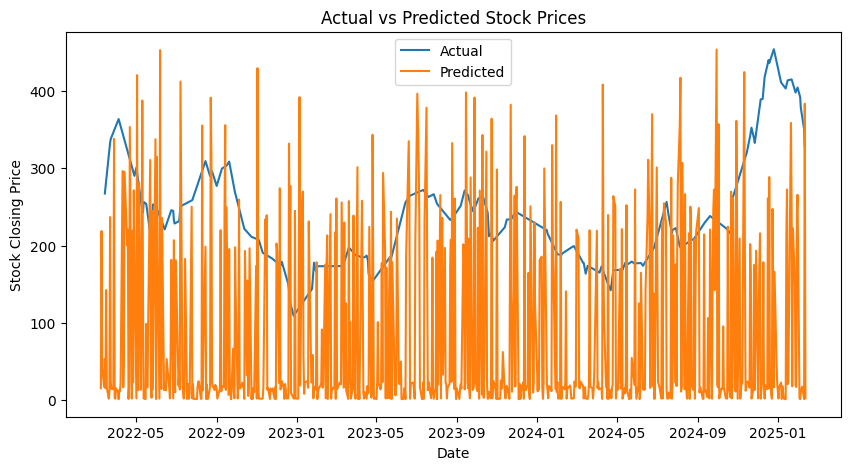

In [15]:
# Plot actual vs predicted prices
plt.figure(figsize=(10,5))
sns.lineplot(x=df['Date'].iloc[-len(y_test):], y=y_test, label='Actual')
sns.lineplot(x=df['Date'].iloc[-len(y_test):], y=y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Stock Closing Price')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()
plt.show()

In [19]:
# Apply Polynomial Features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_scaled)

In [20]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [21]:
# Train Polynomial Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
# Predict on test data
y_pred = model.predict(X_test)

In [25]:
# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f' MAE: {mae}, \n MSE: {mse}, \n RMSE: {rmse}')

 MAE: 0.8531058671500439, 
 MSE: 3.898671596540626, 
 RMSE: 1.9745054055485962


In [26]:
# Predict next stock price
latest_data = np.array([df[features].iloc[-1]])  # Take the latest row
latest_scaled = scaler.transform(latest_data)
latest_poly = poly.transform(latest_scaled)
next_price = model.predict(latest_poly)
print(f'Predicted Next Closing Price: {next_price[0]}')

Predicted Next Closing Price: 342.492569277992


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


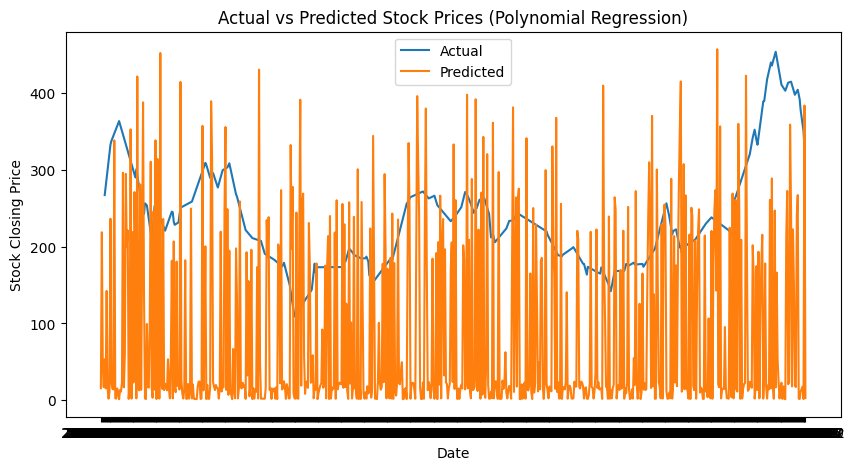

In [27]:
# Plot actual vs predicted prices
plt.figure(figsize=(10,5))
sns.lineplot(x=df['Date'].iloc[-len(y_test):], y=y_test, label='Actual')
sns.lineplot(x=df['Date'].iloc[-len(y_test):], y=y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Stock Closing Price')
plt.title('Actual vs Predicted Stock Prices (Polynomial Regression)')
plt.legend()
plt.show()
